참고: https://www.geeksforgeeks.org/python-seaborn-tutorial/

참고: https://wikidocs.net/137246

# Seaborn

In [1]:
# 필요한 패키지 불러오기
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image

# seaborn
import seaborn as sns

matplotlib으로 대부분의 시각화는 가능하지만, 다음과 같은 이유로 많은사람들이 seaborn을 선호한다.

## seaborn에서만 제공되는 통계기반 plot

In [2]:
# 샘플 데이터셋 불러오기
# tips데이터 사용
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

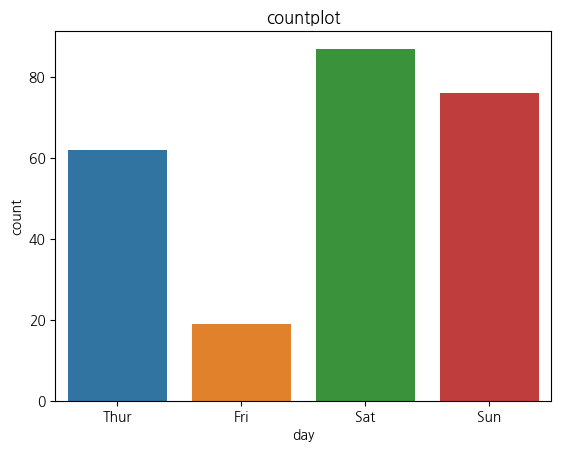

In [4]:
# countplot()
sns.countplot(x = tips['day'])
plt.title('countplot')
plt.show()

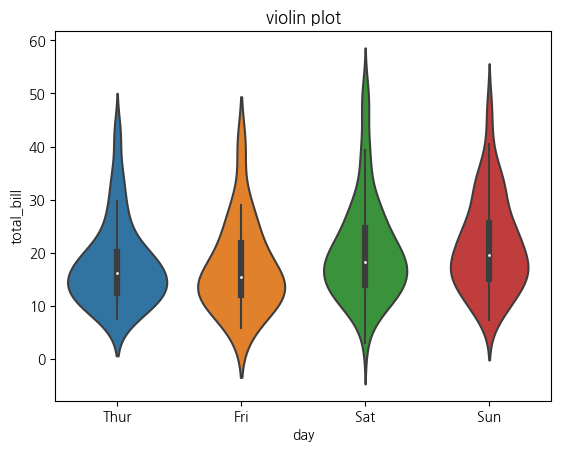

In [6]:
# violinplot
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
plt.title('violin plot')
plt.show()

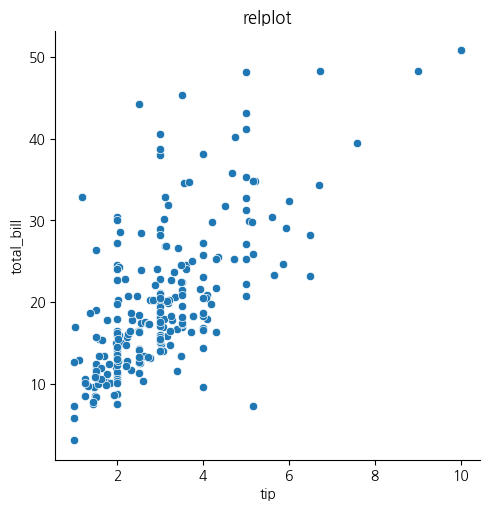

In [7]:
# relplot
sns.relplot(x = 'tip', y = 'total_bill', data = tips)
plt.title('relplot')
plt.show()

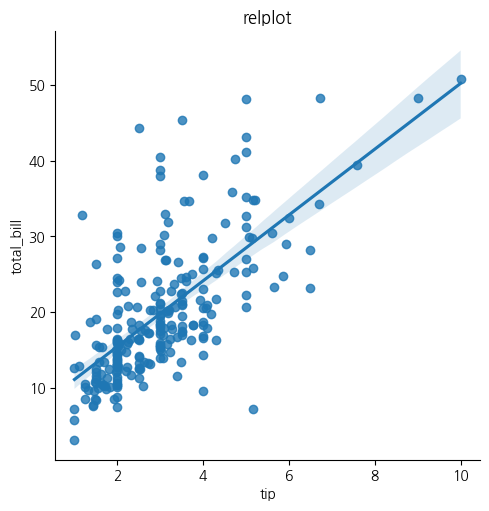

In [11]:
# lmplot
# 산점도에 회귀직선 추가
sns.lmplot(x = 'tip', y = 'total_bill', data = tips)
plt.title('relplot')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_37596\1898871322.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr(), annot = True,linewidths = 1, cmap = 'coolwarm')


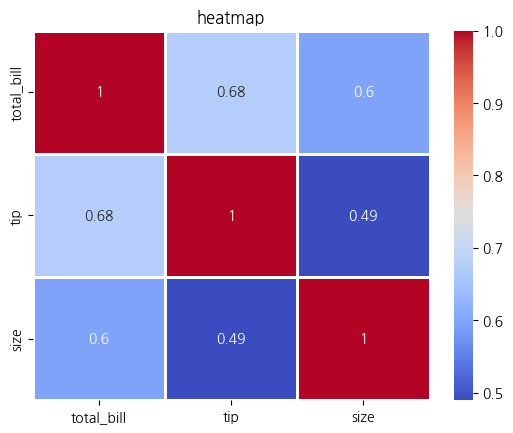

In [18]:
# heatmap
# tips데이터의 상관계수 사용
# annot: 각 셀의 값 표기 유무
# linewidths: 셀 사이에 선의 두께
# cmap: 히트맵의 색
plt.title('heatmap')
sns.heatmap(tips.corr(), annot = True,linewidths = 1, cmap = 'coolwarm')
plt.show()

## 아름다운 스타일링

seaborn은 스타일링에 크게 신경을 쓰지 않아도 defualt컬러가 예쁘게 조합해준다.

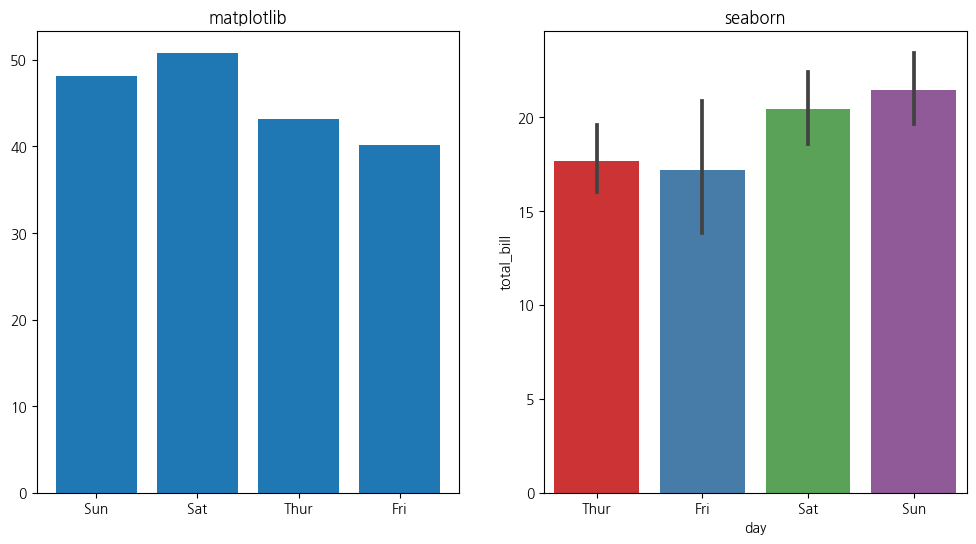

In [19]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

axes[0].bar(tips['day'], tips['total_bill'])
axes[0].set_title('matplotlib')
sns.barplot(x = 'day', y = 'total_bill', data = tips, palette = 'Set1', ax = axes[1])
axes[1].set_title('seaborn')
plt.show()

### seaborn의 컬러파레트

저 자세한 파레트 정보는 seaborn문서를 참고하면 된다

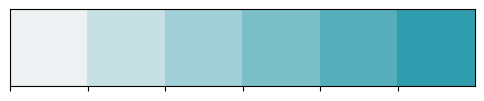

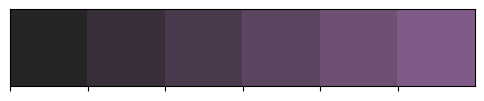

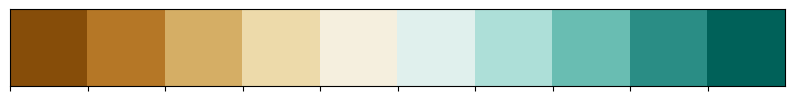

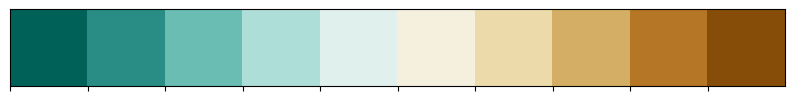

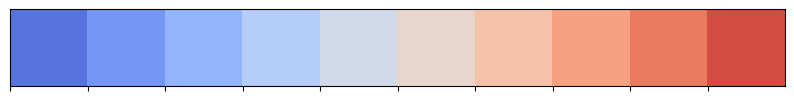

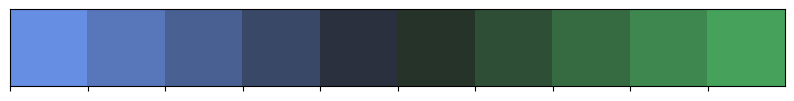

In [20]:
# 컬러파레트
sns.palplot(sns.light_palette((210, 90, 60), input = 'husl'))
sns.palplot(sns.dark_palette('muted purple', input = 'xkcd'))
sns.palplot(sns.color_palette('BrBG', 10))
sns.palplot(sns.color_palette('BrBG_r', 10))
sns.palplot(sns.color_palette('coolwarm', 10))
sns.palplot(sns.diverging_palette(255, 133, l = 60, n = 10, center = 'dark'))

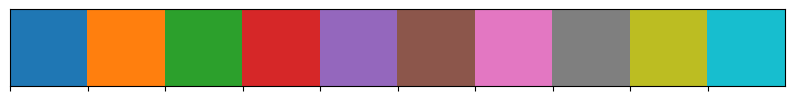

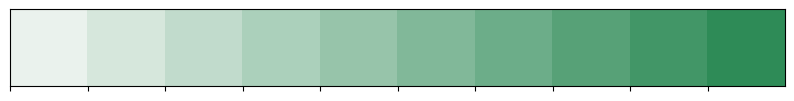

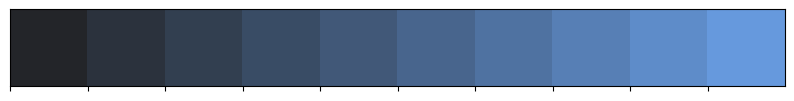

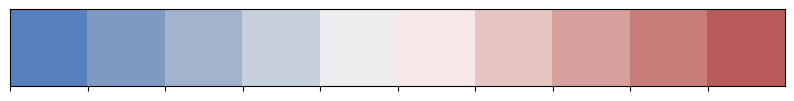

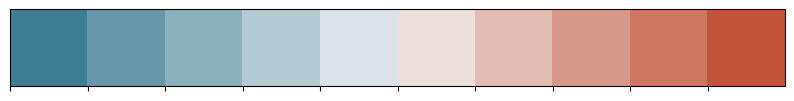

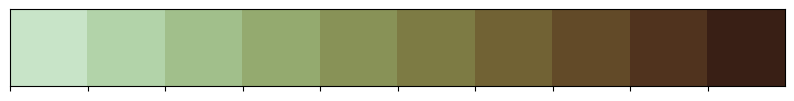

In [22]:
# 또 다른 파레트
sns.palplot(sns.color_palette())
sns.palplot(sns.light_palette("seagreen", n_colors=10))
sns.palplot(sns.dark_palette("#69d", n_colors=10))
sns.palplot(sns.color_palette('vlag', n_colors=10))
sns.palplot(sns.diverging_palette(220, 20, n=10))
sns.palplot(sns.cubehelix_palette(10, start=9.9))

<Axes: xlabel='tip', ylabel='total_bill'>

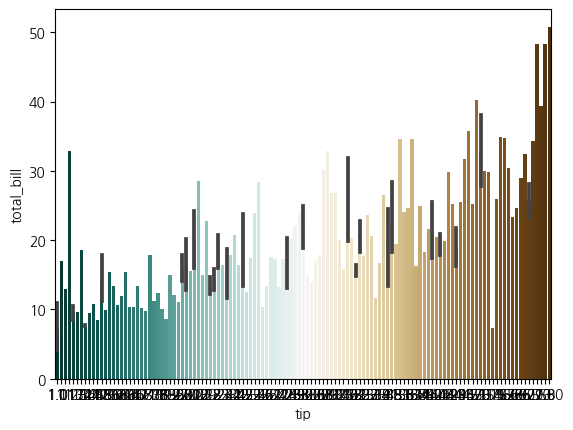

In [23]:
# 칼라파레트 적용 예시
sns.barplot(x = 'tip', y = 'total_bill', data = tips, palette = 'BrBG_r')

<Axes: xlabel='tip', ylabel='total_bill'>

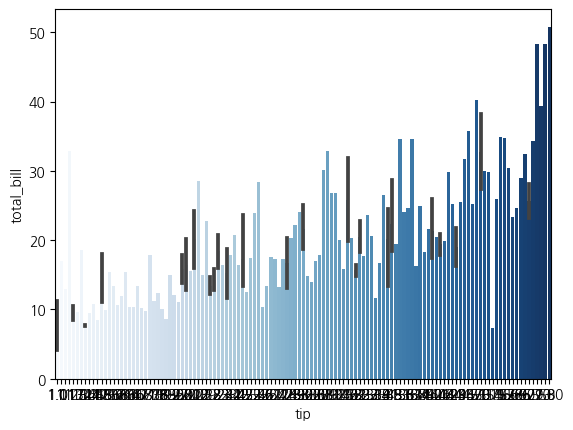

In [26]:
sns.barplot(x = 'tip', y = 'total_bill', data = tips, palette = 'Blues')

## pandas 데이터프레임과 높은 호환성

In [27]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


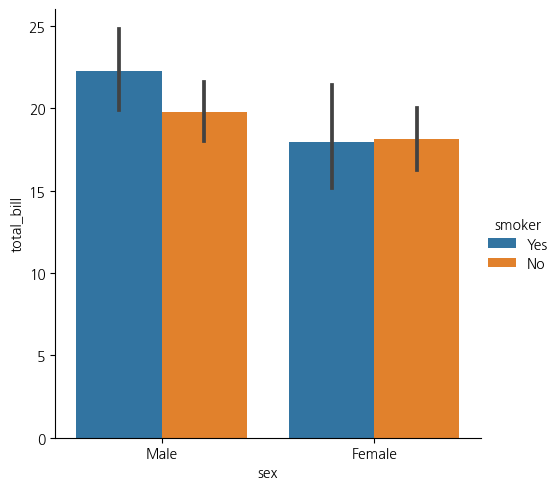

In [28]:
# hue옵션: 조건에 따라 바 그래프를 나눠서 출력해준다.
# xtick, ytick, xlabel, ylabel을 알아서 생성해 준다.
# legend 까지 자동으로 생성해 준다.
# 신뢰구간 또한 알아서 계산해준다.
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips, kind = 'bar')
plt.show()

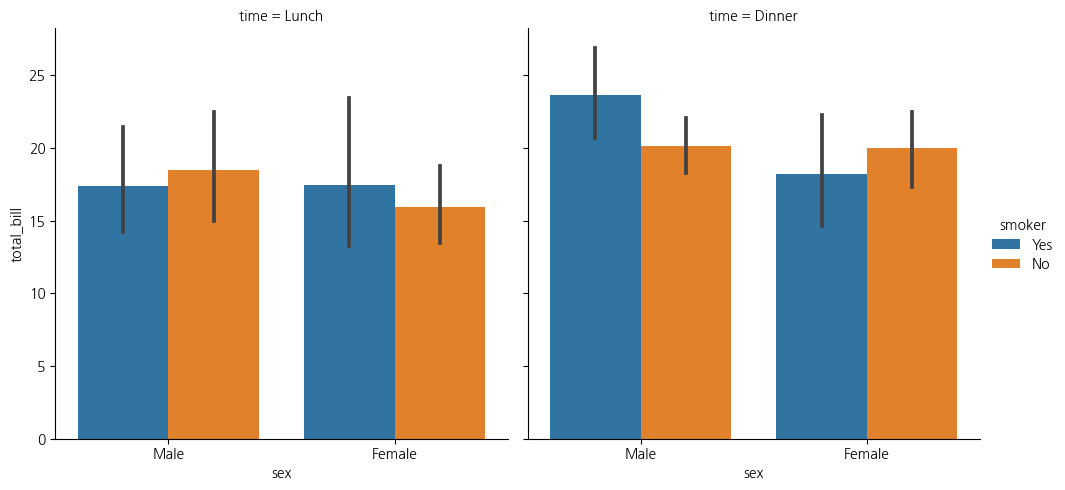

In [29]:
# col옵션: 그래프 자체를 분할해 준다.
# 시간을 기준으로 그래프를 분할해 주었다.
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', col = 'time', data = tips, kind = 'bar')
plt.show()

## Scatterplot

In [30]:
# 0 ~ 1 사이의 임의의 랜덤한 값 생성
import numpy as np
np.random.rand(50)

array([0.52985654, 0.32589392, 0.68537363, 0.40766549, 0.85189754,
       0.60348637, 0.06857167, 0.34522368, 0.8946934 , 0.12567411,
       0.69120681, 0.62082699, 0.10347484, 0.09166736, 0.56632225,
       0.25271286, 0.08314954, 0.33123328, 0.54936517, 0.0283437 ,
       0.96088799, 0.76900818, 0.30570704, 0.50341202, 0.64286605,
       0.67698589, 0.11910138, 0.30319239, 0.58600351, 0.90389443,
       0.04046206, 0.38426056, 0.75207209, 0.8288778 , 0.79242033,
       0.76783974, 0.86605826, 0.41427907, 0.78286563, 0.86836037,
       0.01178038, 0.29812204, 0.49498125, 0.23134609, 0.58246998,
       0.08580872, 0.36729328, 0.68461719, 0.32698075, 0.46969121])

In [31]:
# 0 ~ 50개의 값을 순차적으로 생성
np.arange(50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

### x, y, colors, area 설정하기

* colors 는 임의값을 color 값으로 변환한다.
* area는 점의 넓이를 나타낸다. 값이 커지면 당연히 넓이도 커진다.

In [36]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

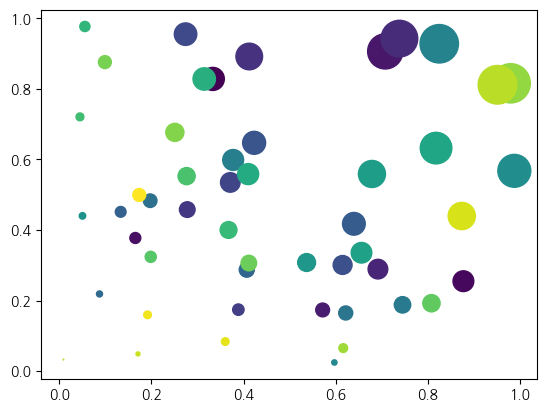

In [33]:
plt.scatter(x, y, s = area, c = colors)
plt.show()

* seaborn에서는 size와 sizes를 동시에 지정
* sizes옵션에서는 사이즈의 min, max를 명시해 준다.
* hue는 컬러 옵션
* palette를 통해 seaborn이 제공하는 palette를 이용

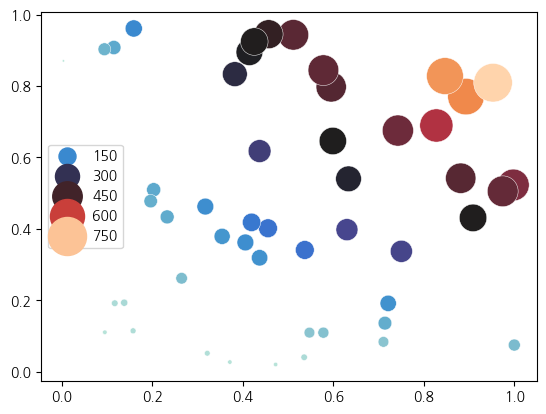

In [37]:
sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), hue=area, palette='icefire')
plt.show()

### cmap과 alpha 설정

* cmap에 컬러를 지정하면, 컬러 값을 모두 같게 가져갈 수 있다.
* alpha값은 투명도를 나타내며 0 ~ 1사이의 값을 지정해 줄 수 있으며, 0에 가까울 수록 투명한 값을 가진다.

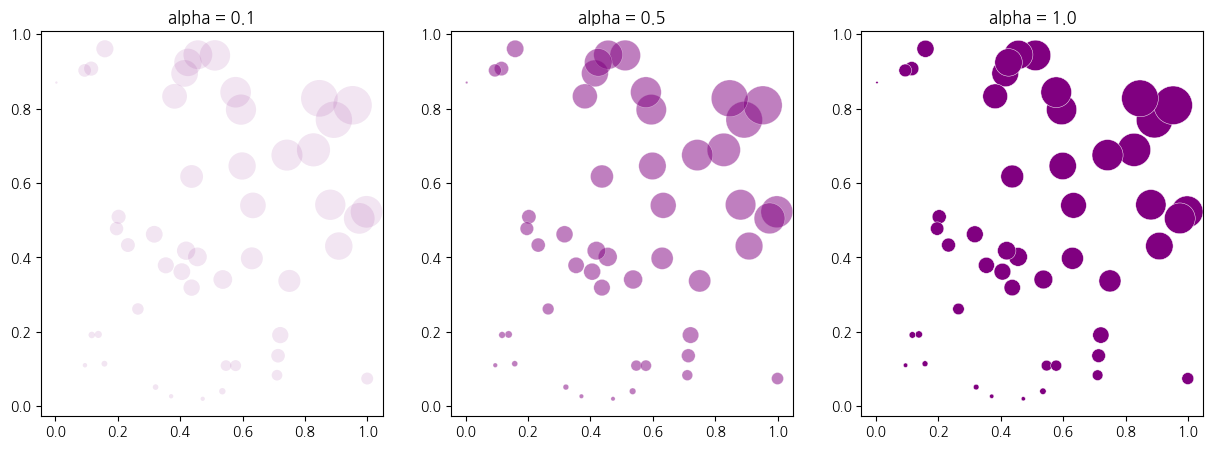

In [38]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
g = sns.scatterplot(x = x, y = y, size = area, sizes = (area.min(), area.max()), color = 'purple', alpha = 0.1)
g.get_legend().remove()
plt.title('alpha = 0.1')

plt.subplot(132)
plt.title('alpha = 0.5')
g = sns.scatterplot(x = x, y = y, size = area, sizes = (area.min(), area.max()), color = 'purple', alpha = 0.5)
g.get_legend().remove()


plt.subplot(133)
plt.title('alpha = 1.0')
g = sns.scatterplot(x = x, y = y, size = area, sizes = (area.min(), area.max()), color = 'purple', alpha = 1.0)
g.get_legend().remove()

plt.show()

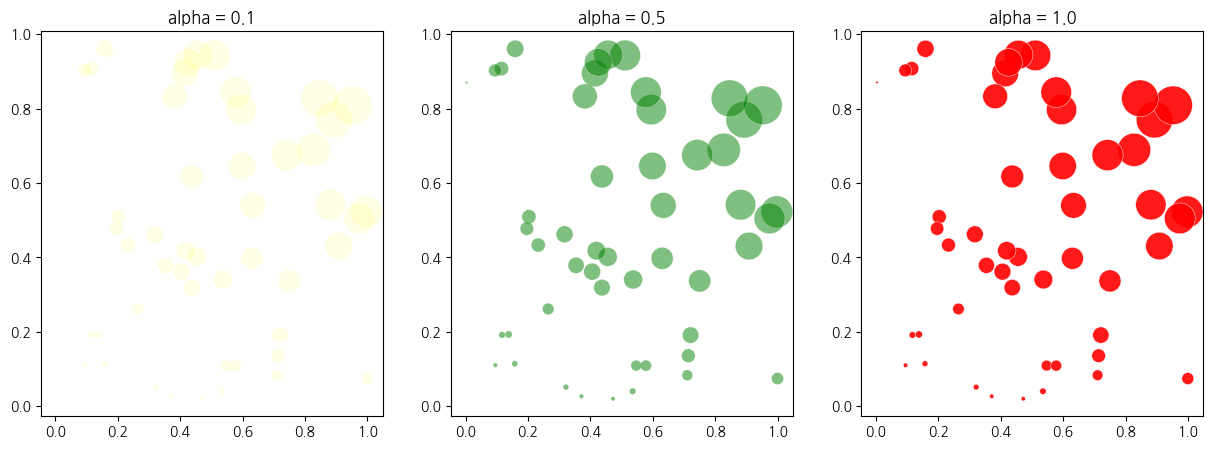

In [39]:
# 색상을 변경하여 변화를 파악
plt.figure(figsize = (15, 5))

plt.subplot(131)
g = sns.scatterplot(x = x, y = y, size = area, sizes = (area.min(), area.max()), color = 'yellow', alpha = 0.1)
g.get_legend().remove()
plt.title('alpha = 0.1')

plt.subplot(132)
plt.title('alpha = 0.5')
g = sns.scatterplot(x = x, y = y, size = area, sizes = (area.min(), area.max()), color = 'green', alpha = 0.5)
g.get_legend().remove()


plt.subplot(133)
plt.title('alpha = 1.0')
g = sns.scatterplot(x = x, y = y, size = area, sizes = (area.min(), area.max()), color = 'red', alpha = 0.9)
g.get_legend().remove()

plt.show()

## Barplot, Barhplot

### Barplot

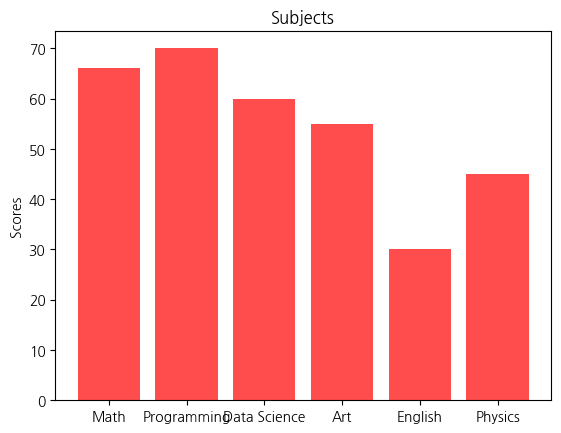

In [42]:
# 데이터 입력
#  matplotlib
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 70, 60, 55, 30, 45]

plt.bar(x, y, align = 'center', alpha = 0.7, color = 'red')

plt.xticks(x)
plt.ylabel('Scores')
plt.title('Subjects')
plt.show()

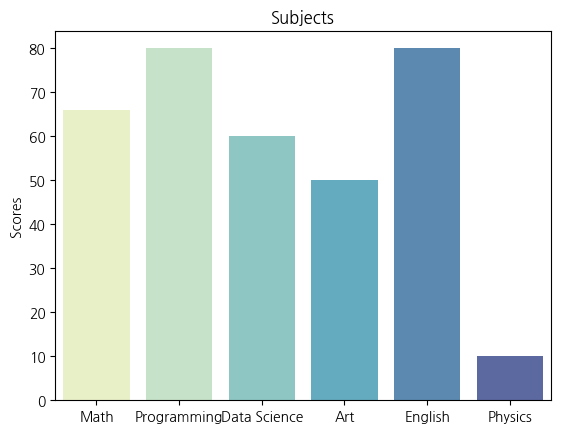

In [44]:
# seaborn
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

sns.barplot(x=x, y=y, alpha=0.8, palette='YlGnBu')

plt.ylabel('Scores')
plt.title('Subjects')
plt.show()

### Barhplot

barh 함수에서는 xticks로 설정했던 부분을 yticks로 변경

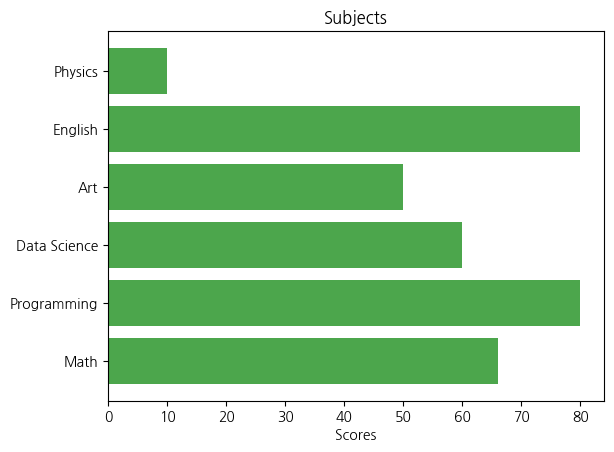

In [45]:
#  matplotlib
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.barh(x, y, align='center', alpha=0.7, color='green')
plt.yticks(x)
plt.xlabel('Scores')
plt.title('Subjects')

plt.show()

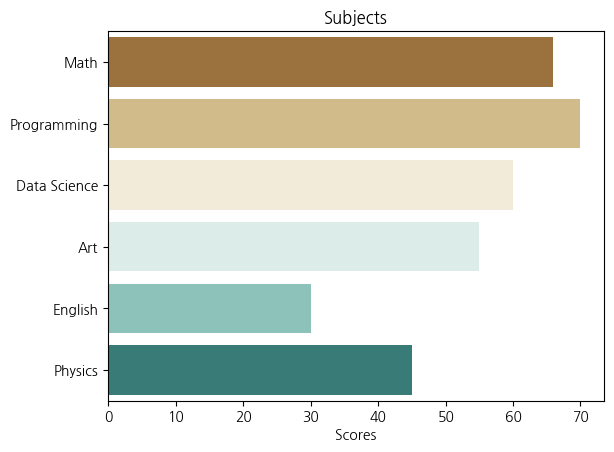

In [47]:
# seaborn
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 70, 60, 55, 30, 45]

ax = sns.barplot(x = y, y = x, alpha = 0.9, palette = 'BrBG')

plt.xlabel('Scores')
plt.title('Subjects')

plt.show()

### Barplot에서 비교 그래프 그리기

* 그래프를 임의로 그려야 하는 경우 -> matplotlib
* DataFrame을 가지고 그리는 경우 -> seaborn
* seaborn에선 hue옵션으로 매우 쉽게 비교 barplot을 그릴 수 있다.

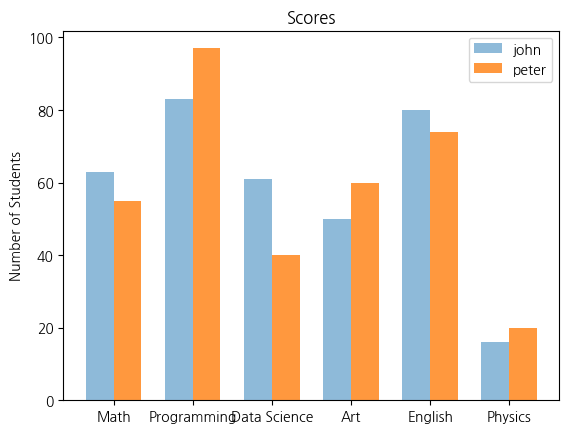

In [49]:
# matplotlib
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label))
y_1 = [63, 83, 61, 50, 80, 16]
y_2 = [55, 97, 40, 60, 74, 20]

# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.bar(x - width/2, y_1, width, align = 'center', alpha = 0.5)
axes.bar(x + width/2, y_2, width, align = 'center', alpha = 0.8)

# xticks설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.ylabel('Number of Students')
plt.title('Scores')

plt.legend(['john', 'peter'])

plt.show()

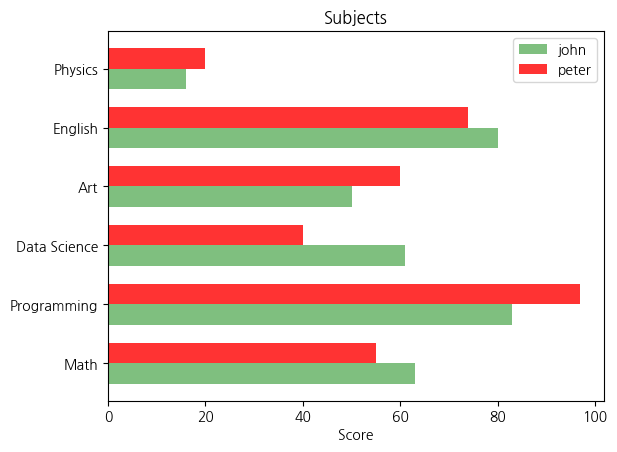

In [51]:
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label))
y_1 = [63, 83, 61, 50, 80, 16]
y_2 = [55, 97, 40, 60, 74, 20]


# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.barh(x - width/2, y_1, width, align='center', alpha=0.5, color='green')
axes.barh(x + width/2, y_2, width, align='center', alpha=0.8, color='red')

# xtick 설정
plt.yticks(x)
axes.set_yticklabels(x_label)
plt.xlabel('Score')
plt.title('Subjects')

plt.legend(['john', 'peter'])

plt.show()

In [52]:
# seaborn
# titanic 데이터 사용
titanic = sns.load_dataset('titanic')

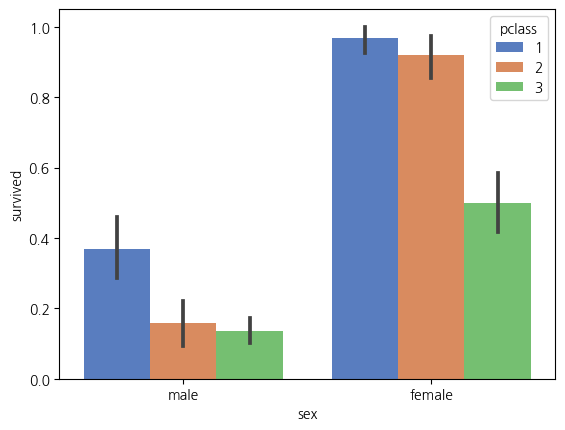

In [53]:
sns.barplot(x = 'sex', y = 'survived', hue = 'pclass', data = titanic, palette = 'muted')
plt.show()

## Line Plot

In [60]:
# 샘플 데이터 생성
x = np.arange(0, 10, 0.1)
y = 1 + np.sin(x)

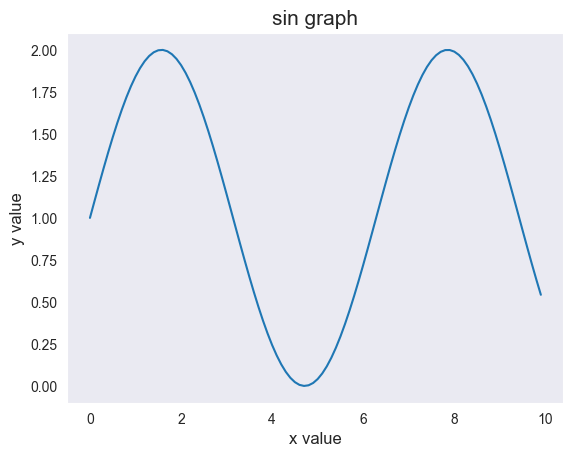

In [63]:
# grid 스타일 설정
# whitegrid, darkgrid, white, dark, ticks

sns.set_style('dark')

sns.lineplot(x = x, y = y)

plt.xlabel('x value', fontsize = 12)
plt.ylabel('y value', fontsize = 12)
plt.title('sin graph', fontsize=15)

plt.show()

### 2개 이상의 그래프 그리기

* color: 컬러 옵션
* alpha: 투명도 옵션

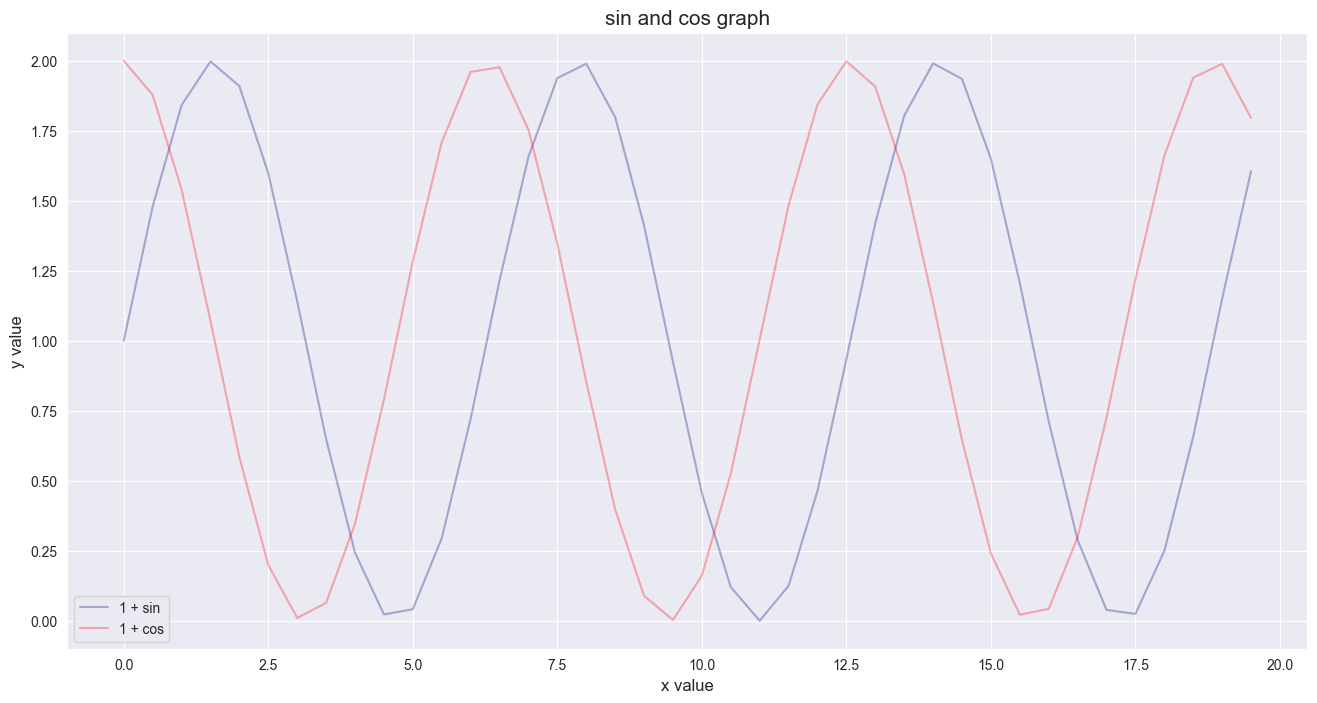

In [68]:
# 샘플 데이터셋 설정
x = np.arange(0, 20, 0.5)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)
plt.figure(figsize = (16, 8))
sns.lineplot(x = x, y = y_1, label = '1 + sin', color = 'navy', alpha = 0.3)
sns.lineplot(x = x, y = y_2, label = '1 + cos', color = 'red', alpha = 0.3)


plt.xlabel('x value', fontsize=12)
plt.ylabel('y value', fontsize=12)
plt.title('sin and cos graph', fontsize=15)

plt.grid()
plt.legend()

plt.show()

### 마커 스타일링

* marker:마커옵션

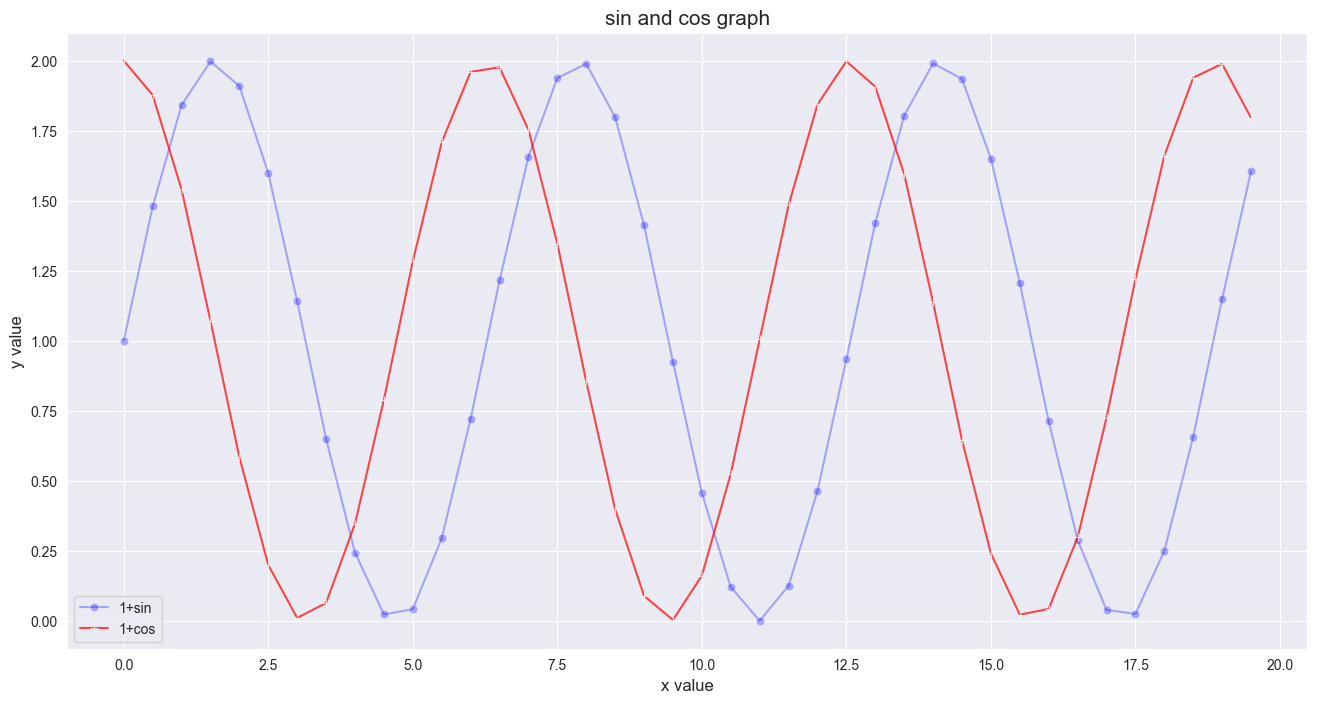

In [69]:
x = np.arange(0, 20, 0.5)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)
plt.figure(figsize = (16, 8))
sns.lineplot(x=x, y=y_1, label='1+sin', color='blue', alpha=0.3, marker='o')
sns.lineplot(x=x, y=y_2, label='1+cos', color='red', alpha=0.7, marker='+')


plt.xlabel('x value', fontsize=12)
plt.ylabel('y value', fontsize=12)
plt.title('sin and cos graph', fontsize=15)

plt.grid()
plt.legend()

plt.show()

### 라인 스타일 변경하기

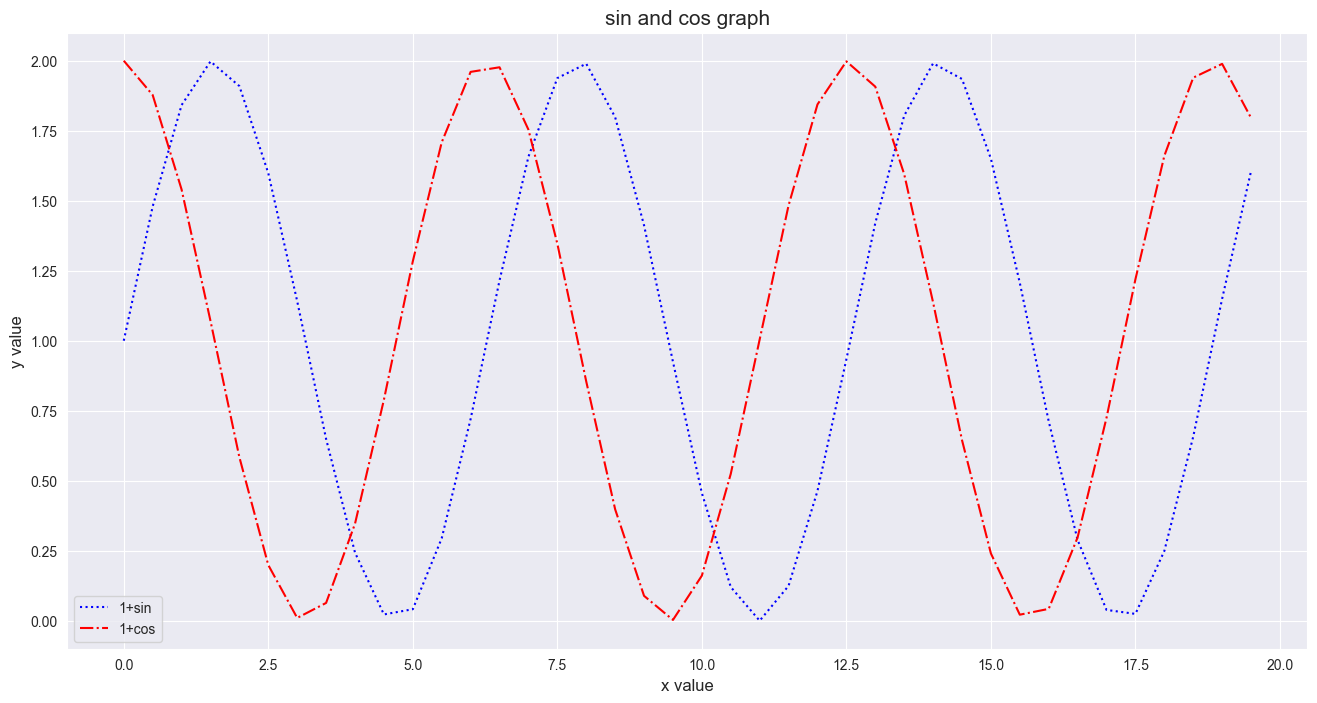

In [70]:
x = np.arange(0, 20, 0.5)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)
plt.figure(figsize = (16, 8))
sns.lineplot(x=x, y=y_1, label='1+sin', color='blue', linestyle=':')
sns.lineplot(x=x, y=y_2, label='1+cos', color='red', linestyle='-.')


plt.xlabel('x value', fontsize=12)
plt.ylabel('y value', fontsize=12)
plt.title('sin and cos graph', fontsize=15)

plt.grid()
plt.legend()

plt.show()

## Pie Chart

### pie chart 옵션

* explode: 파이에서 툭 튀어져 나온 비율
* autopct: 퍼센트 자동으로 표기
* shadow: 그림자 표시
* startangle: 파이를 그리기 시작할 각도

texts, autotexts 인자를 리턴받는다.<br>
* texts는 label에 대한 텍스트 효과를,
* autotexts는 파이 뒤 그려지는 텍스트 효과를 다룰 때 활용한다.


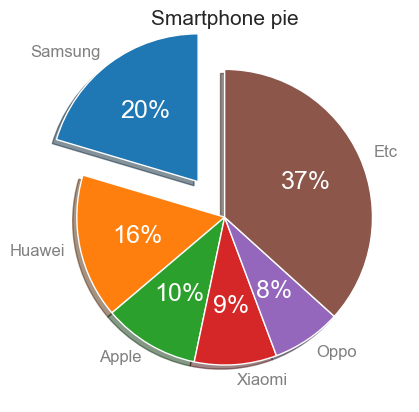

In [85]:
# matplotlib사용
labels = ['Samsung', 'Huawei', 'Apple', 'Xiaomi', 'Oppo', 'Etc']
sizes = [20.4, 15.8, 10.5, 9, 7.6, 36.7]
explode = (0.3, 0, 0, 0, 0, 0)

# texts, autotexts 인자를 활용하여 텍스트 스타일링을 적용한다
patches, texts, autotexts = plt.pie(sizes, 
                                    # explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정
                                    explode=explode, 
                                    labels=labels,  
                                    autopct='%1.f%%',
                                    shadow=True, 
                                    startangle=90)


plt.title('Smartphone pie', fontsize=15)

# label 텍스트에 대한 스타일 적용
for t in texts:
    t.set_fontsize(12)
    t.set_color('gray')
    
# pie 위의 텍스트에 대한 스타일 적용
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(18)

plt.show()

### pie chart 순서대로 추가해보기

#### 1. 기본 사용

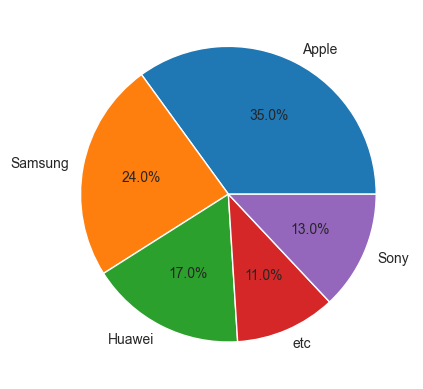

In [86]:
ratio = [35, 24, 17, 11, 13]
labels = ['Apple', 'Samsung', 'Huawei', 'etc', 'Sony']

# 소수점 한자리까지
plt.pie(ratio, labels = labels, autopct = '%.1f%%')
plt.show()

#### 2. 시작 각도와 방향 설정하기

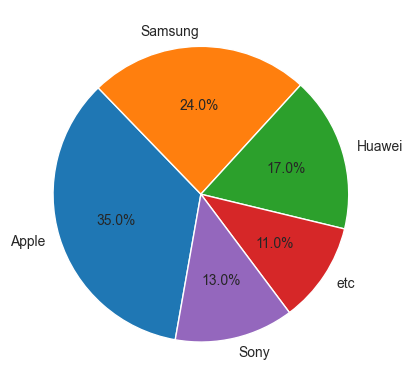

In [87]:
ratio = [35, 24, 17, 11, 13]
labels = ['Apple', 'Samsung', 'Huawei', 'etc', 'Sony']

# 소수점 한자리까지
# strangle: 부채꼴이 그려지는 시작 각도 설정, 디폴트는 0도(양의 방향 x축)
# counterclock = False -> 시계방향 순서로 부채꼴 영역 표시
plt.pie(ratio, labels = labels, autopct = '%.1f%%', startangle = 260, counterclock=False)
plt.show()

#### 3. 중심에서 벗어나는 정도 설정하기

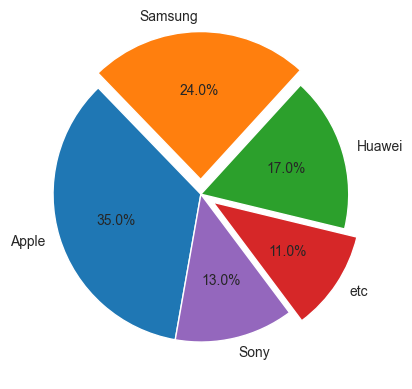

In [90]:
ratio = [35, 24, 17, 11, 13]
labels = ['Apple', 'Samsung', 'Huawei', 'etc', 'Sony']
# 중심에서 벗어나는 정도 설정
explode = [0, 0.10, 0, 0.10, 0]

plt.pie(ratio, labels = labels, autopct = '%.1f%%', startangle = 260, counterclock=False, explode = explode)
plt.show()

#### 4. 색상 지정하기

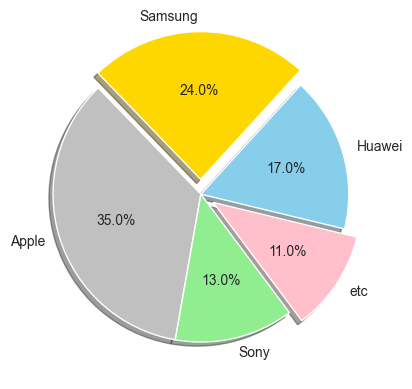

In [92]:
# 방법 1
ratio = [35, 24, 17, 11, 13]
labels = ['Apple', 'Samsung', 'Huawei', 'etc', 'Sony']
explode = [0, 0.10, 0, 0.10, 0]
colors = ['silver', 'gold', 'skyblue', 'pink', 'lightgreen']
plt.pie(ratio, labels = labels, autopct = '%.1f%%', startangle = 260, counterclock=False, 
        explode = explode, shadow = True, colors = colors)
plt.show()

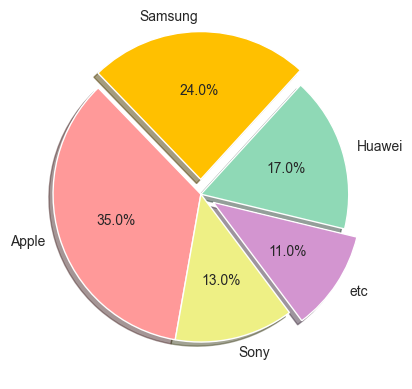

In [94]:
# 방법 2
# Hex code를 사용하여 다양한 색상을 지정할 수 있다
ratio = [35, 24, 17, 11, 13]
labels = ['Apple', 'Samsung', 'Huawei', 'etc', 'Sony']
explode = [0, 0.10, 0, 0.10, 0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#eef085']

plt.pie(ratio, labels = labels, autopct = '%.1f%%', startangle = 260, counterclock=False, 
        explode = explode, shadow = True, colors = colors)
plt.show()

#### 5. 부채꼴 스타일 지정하기

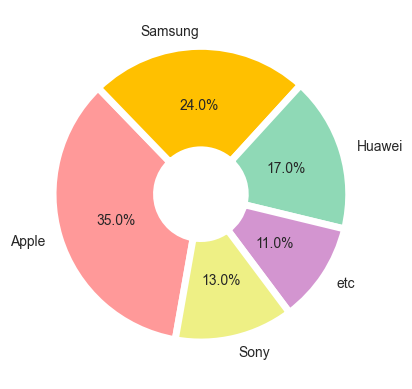

In [95]:
ratio = [35, 24, 17, 11, 13]
labels = ['Apple', 'Samsung', 'Huawei', 'etc', 'Sony']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#eef085']
# wedgeprops는 부채꼴 영역의 스타일을 설정
# width’, 'edgecolor’, 'linewidth’키를 이용해서 각각 부채꼴 영역의 너비(반지름에 대한 비율)
# 테두리의 색상, 테두리 선의 너비를 설정
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels = labels, autopct = '%.1f%%', startangle = 260, counterclock=False, 
        wedgeprops = wedgeprops, colors = colors)
plt.show()